# Heart Disease Prediction using Logistic Regression
- Importing essential libraries:

In [9]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sn

- Here, our classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).
### Loading Dataset and handling the missing values

In [3]:
disease_df = pd.read_csv("framingham.csv")
disease_df.drop(['education'], inplace = True, axis = 1) # Education is irrelevant
disease_df.rename(columns = {'male': 'Sex_male'}, inplace = True) # Just for our comfort

disease_df.dropna(axis = 0, inplace = True) # Removing null rows
# Below two lines are for testing
print(disease_df.head(), disease_df.shape)
print(disease_df.currentSmoker.value_counts())

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

## Splitting the data into Test and Train sets

In [5]:
X = np.asarray(disease_df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose']])
Y = np.asarray(disease_df['TenYearCHD'])
# Normalization
X = preprocessing.StandardScaler().fit(X).transform(X)
# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

print("Train set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Train set:  (2625, 6) (2625,)
Test set:  (1126, 6) (1126,)


## Analysing the number of CHD patients

C:\Users\KARTHIKEYA VEEBHUTHI\AppData\Local\Temp\ipykernel_14292\2295178268.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x = "TenYearCHD", data= disease_df, palette="BuGn_r")


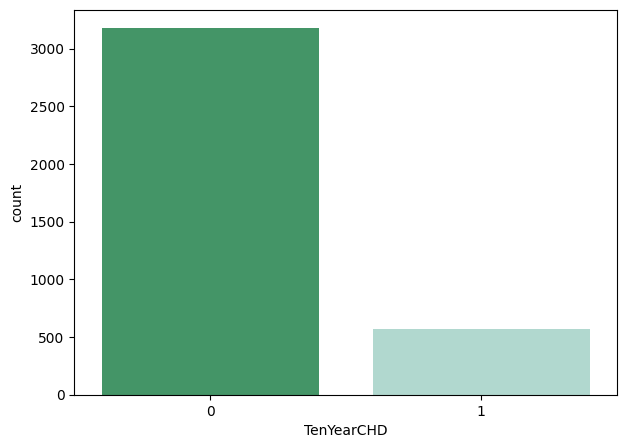

In [14]:
plt.figure(figsize = (7,5))
sn.countplot(x = "TenYearCHD", data= disease_df, palette="BuGn_r")
plt.show()

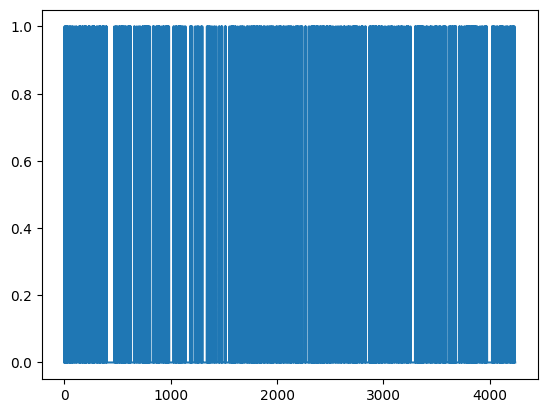

In [15]:
var = disease_df["TenYearCHD"].plot()
plt.show(var)

## Fitting the Logistic Regression Model

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

## Evaluation and Accuracy

In [17]:
from sklearn.metrics import accuracy_score
print("Accuracy Score of the model is: ", accuracy_score(y_test, y_pred))

Accuracy Score of the model is:  0.8490230905861457


## Confusion Matrix

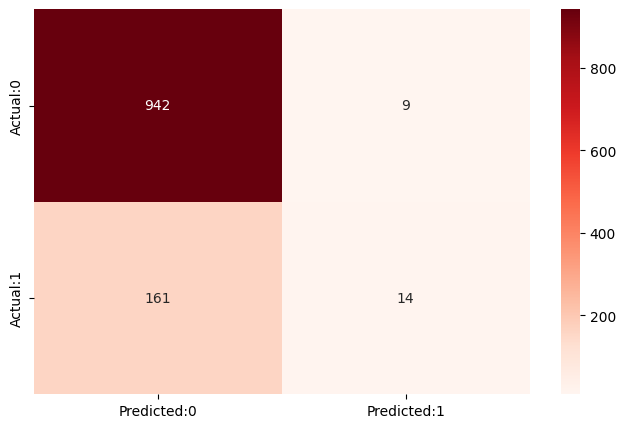

The details for Confusion matrix is: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



In [21]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(data = cm,
                        columns = ["Predicted:0", "Predicted:1"],
                        index = ["Actual:0", "Actual:1"])
plt.figure(figsize = (8,5))
sn.heatmap(conf_mat, annot=True, fmt="d",cmap="Reds")

plt.show()
print("The details for Confusion matrix is: ")
print(classification_report(y_test, y_pred))